# 03 - Model Training and Hyperparameter Tuning

## Objectives
- Load cleaned data
- Split into train/test sets
- Train Random Forest Regressor
- Perform hyperparameter tuning with GridSearchCV
- Evaluate model performance
- Save trained model for deployment

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/sararosati/Desktop/vscode-projects/Heritage-Housing/Heritage-housing/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")
current_dir = os.getcwd()
current_dir

You set a new current directory


'/Users/sararosati/Desktop/vscode-projects/Heritage-Housing/Heritage-housing'

## Section 1: Import Libraries and Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [4]:
# Load cleaned data from previous notebook
df_cleaned = pd.read_csv('outputs/X_y_cleaned.csv')

# Separate X and y
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

print("Data loaded successfully!")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nFirst 5 rows of X:")
print(X.head())

Data loaded successfully!
X shape: (1460, 21)
y shape: (1460,)

First 5 rows of X:
   1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0       856     854.0           3.0             3         706             2   
1      1262       0.0           3.0             1         978             0   
2       920     866.0           3.0             2         486             2   
3       961       0.0           3.0             3         216             0   
4      1145       0.0           4.0             0         655             2   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  KitchenQual  \
0        150         548             1       2003.0  ...            2   
1        284         460             1       1976.0  ...            3   
2        434         608             1       2001.0  ...            2   
3        540         642             2       1998.0  ...            2   
4        490         836             1       2000.0  ...            2   

   

## Section 2: Train/Test Split

In [5]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train/Test Split Summary:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTrain set size: {len(X_train)} cases (80%)")
print(f"Test set size: {len(X_test)} cases (20%)")

print("\n" + "="*50)
print("Data split successfully!")

Train/Test Split Summary:
X_train shape: (1168, 21)
X_test shape: (292, 21)
y_train shape: (1168,)
y_test shape: (292,)

Train set size: 1168 cases (80%)
Test set size: 292 cases (20%)

Data split successfully!


## Section 3: Model Training - Random Forest Baseline

In [6]:
# Train baseline Random Forest model
print("Training baseline Random Forest Regressor...")
print("This may take a minute...\n")

rf_baseline = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_baseline.fit(X_train, y_train)

# Make predictions
y_pred_train_baseline = rf_baseline.predict(X_train)
y_pred_test_baseline = rf_baseline.predict(X_test)

# Evaluate
r2_train_baseline = r2_score(y_train, y_pred_train_baseline)
r2_test_baseline = r2_score(y_test, y_pred_test_baseline)
mae_test_baseline = mean_absolute_error(y_test, y_pred_test_baseline)
rmse_test_baseline = np.sqrt(mean_squared_error(y_test, y_pred_test_baseline))

print("="*50)
print("BASELINE MODEL PERFORMANCE")
print("="*50)
print(f"R² Score (Train): {r2_train_baseline:.4f}")
print(f"R² Score (Test):  {r2_test_baseline:.4f}")
print(f"MAE (Test): ${mae_test_baseline:,.2f}")
print(f"RMSE (Test): ${rmse_test_baseline:,.2f}")
print("\nTarget R² Score: ≥ 0.75")
if r2_test_baseline >= 0.75:
    print("✅ TARGET ACHIEVED!")
else:
    print(f"⚠️  Need improvement: {0.75 - r2_test_baseline:.4f}")

Training baseline Random Forest Regressor...
This may take a minute...

BASELINE MODEL PERFORMANCE
R² Score (Train): 0.9801
R² Score (Test):  0.8936
MAE (Test): $18,023.90
RMSE (Test): $28,569.06

Target R² Score: ≥ 0.75
✅ TARGET ACHIEVED!


## Section 4: Hyperparameter Tuning with GridSearchCV

In [7]:
# Define hyperparameter grid for tuning
# We'll test 6 different hyperparameters with multiple values each
print("Setting up hyperparameter grid for GridSearchCV...")
print("This will test multiple combinations of hyperparameters\n")

param_grid = {
    'n_estimators': [50, 100, 150, 200],           # Number of trees
    'max_depth': [10, 15, 20, 25],                 # Maximum tree depth
    'min_samples_split': [2, 5, 10],               # Min samples to split node
    'min_samples_leaf': [1, 2, 4],                 # Min samples in leaf
    'max_features': ['sqrt', 'log2'],              # Features per split
    'bootstrap': [True, False]                     # Use bootstrap samples
}

print("Hyperparameters to tune:")
for param, values in param_grid.items():
    print(f"  - {param}: {values}")

total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)

print(f"\nTotal combinations to test: {total_combinations}")
print("Starting GridSearchCV (this may take 3-5 minutes)...\n")

Setting up hyperparameter grid for GridSearchCV...
This will test multiple combinations of hyperparameters

Hyperparameters to tune:
  - n_estimators: [50, 100, 150, 200]
  - max_depth: [10, 15, 20, 25]
  - min_samples_split: [2, 5, 10]
  - min_samples_leaf: [1, 2, 4]
  - max_features: ['sqrt', 'log2']
  - bootstrap: [True, False]

Total combinations to test: 576
Starting GridSearchCV (this may take 3-5 minutes)...



In [8]:
# Execute GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='r2',                  # Optimize for R² score
    n_jobs=-1,                     # Use all processors
    verbose=1                      # Print progress
)

# Fit the grid search
grid_search.fit(X_train, y_train)

print("\n" + "="*50)
print("GRIDSEARCHCV COMPLETED!")
print("="*50)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest R² Score (CV): {best_score:.4f}")
print(f"\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"  - {param}: {value}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits

GRIDSEARCHCV COMPLETED!

Best R² Score (CV): 0.8530

Best Hyperparameters:
  - bootstrap: False
  - max_depth: 20
  - max_features: sqrt
  - min_samples_leaf: 2
  - min_samples_split: 5
  - n_estimators: 200


## Section 5: Evaluate Best Model

In [9]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Evaluate on train and test sets
r2_train_best = r2_score(y_train, y_pred_train_best)
r2_test_best = r2_score(y_test, y_pred_test_best)
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_pred_test_best))

print("="*50)
print("BEST MODEL PERFORMANCE")
print("="*50)
print(f"R² Score (Train): {r2_train_best:.4f}")
print(f"R² Score (Test):  {r2_test_best:.4f}")
print(f"MAE (Test): ${mae_test_best:,.2f}")
print(f"RMSE (Test): ${rmse_test_best:,.2f}")

print("\n" + "="*50)
print("COMPARISON: Baseline vs Best Model")
print("="*50)
print(f"Baseline R² (Test): {r2_test_baseline:.4f}")
print(f"Best Model R² (Test): {r2_test_best:.4f}")
improvement = ((r2_test_best - r2_test_baseline) / r2_test_baseline) * 100
print(f"Improvement: {improvement:+.2f}%")

print("\n" + "="*50)
print("TARGET VERIFICATION")
print("="*50)
print(f"Target R² Score: ≥ 0.75")
if r2_test_best >= 0.75:
    print("✅ TARGET ACHIEVED!")
else:
    print(f"⚠️  Below target by: {0.75 - r2_test_best:.4f}")

BEST MODEL PERFORMANCE
R² Score (Train): 0.9898
R² Score (Test):  0.8897
MAE (Test): $17,200.31
RMSE (Test): $29,091.14

COMPARISON: Baseline vs Best Model
Baseline R² (Test): 0.8936
Best Model R² (Test): 0.8897
Improvement: -0.44%

TARGET VERIFICATION
Target R² Score: ≥ 0.75
✅ TARGET ACHIEVED!


## Section 6: Visualize Predictions

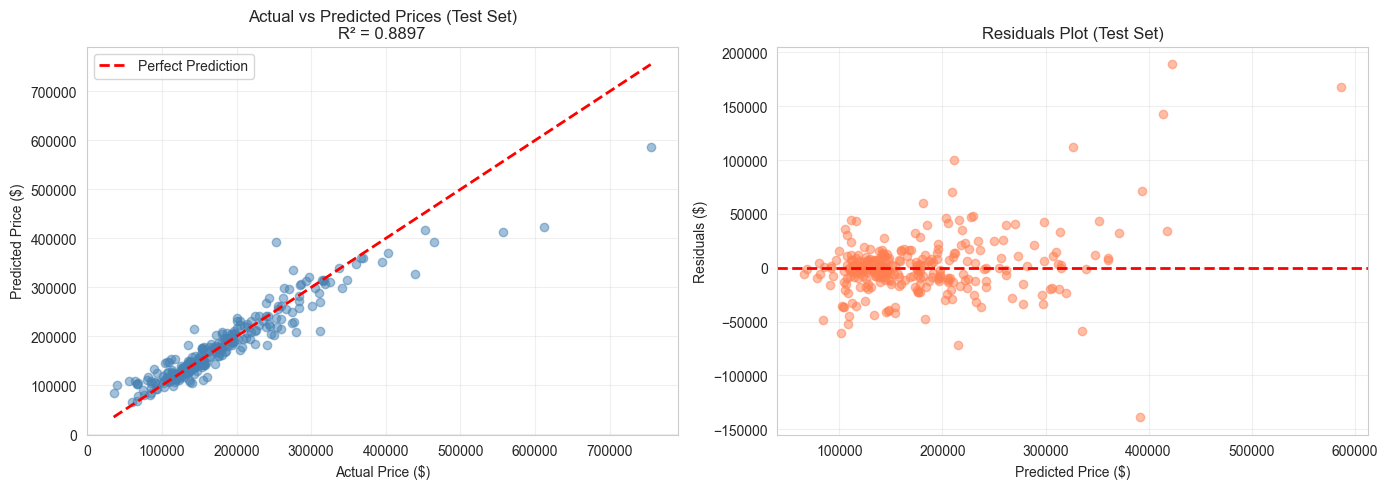

Visualization complete!

Residuals Summary:
  Mean: $1,154.01
  Std Dev: $29,118.14
  Min: $-138,723.72
  Max: $188,773.27


In [10]:
# Visualize Actual vs Predicted (Test Set)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Actual vs Predicted
axes[0].scatter(y_test, y_pred_test_best, alpha=0.5, color='steelblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Actual vs Predicted Prices (Test Set)\nR² = {r2_test_best:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y_test - y_pred_test_best
axes[1].scatter(y_pred_test_best, residuals, alpha=0.5, color='coral')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Residuals Plot (Test Set)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization complete!")
print(f"\nResiduals Summary:")
print(f"  Mean: ${residuals.mean():,.2f}")
print(f"  Std Dev: ${residuals.std():,.2f}")
print(f"  Min: ${residuals.min():,.2f}")
print(f"  Max: ${residuals.max():,.2f}")